In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

In [2]:
df = pd.read_csv('company_dataset.csv')
df

,Refno,PrjCat,Year_End,AudType,WDA_FA,FA_Cost,D_Expense,Cur_Assets,Stock_Invent,Cash_Bank,...,Reserves,NC_Liab,Cur_Liab,Turnover,Pro_Bef_Tax,Tax,Pro_Aft_Tax,Tot_Liab,Tot_Assets,Unnamed: 20
0,0002-1992-GENN,24,31/03/2001,0,243.932,326.252,0.0,214.358,169.127,0.000,...,39.342,110.446,286.502,801.461,19.703,-10.370,30.073,396.948,383.485,NaN
1,0002-1992-GENN,24,31/03/2002,0,233.469,335.454,0.0,189.859,116.591,29.427,...,85.014,72.728,244.085,837.821,39.589,6.084,33.505,316.813,335.877,NaN
2,0003-1992-GENN,21,31/12/2003,0,113.110,366.460,0.0,575.690,95.590,36.210,...,24.660,11.070,667.190,753.540,-82.550,0.000,-82.550,678.260,707.490,NaN
3,0003-1992-GENN,21,31/12/2004,0,168.380,434.974,0.0,718.230,140.907,26.937,...,4.245,23.596,872.894,1.047,-11.678,8.735,-20.413,896.490,886.074,NaN
4,0003-1992-GENN,21,31/12/2005,0,54.346,129.209,0.0,257.952,10.474,4.214,...,-253.997,8.702,537.718,247.197,-265.843,7.601,-273.444,546.420,272.640,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23999,9999-2008-GENN,71,31/03/2011,0,15.960,21.910,0.0,28.700,0.000,3.700,...,50.920,0.000,6.990,7.800,1.580,0.000,1.580,6.990,32.400,NaN
24000,9999-2008-GENN,71,31/03/2012,0,11.070,21.910,0.0,53.840,0.000,2.890,...,74.120,0.000,4.050,36.310,23.270,0.080,23.200,4.050,56.730,NaN
24001,9999-2008-GENN,71,31/03/2013,0,16.475,32.644,0.0,23.176,0.000,3.171,...,68.164,0.000,37.045,2.676,-5.680,0.275,-5.955,37.045,26.347,NaN
24002,9999-2008-GENN,71,31/03/2014,0,9.707,32.644,0.0,34.528,0.000,34.525,...,88.092,0.000,7.451,30.252,19.927,0.000,19.927,7.451,69.053,NaN


In [3]:
gp = df.groupby('Refno')
gp

In [4]:
s_g = gp.get_group('0003-1992-GENN')

In [5]:
len(s_g)

17

In [6]:
pd.to_datetime(s_g['Year_End'])

C:\Users\sanjulam\AppData\Local\Temp\ipykernel_11500\2062418151.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pd.to_datetime(s_g['Year_End'])


2    2003-12-31
3    2004-12-31
4    2005-12-31
5    2006-12-31
6    2007-12-31
7    2008-12-31
8    2009-12-31
9    2010-12-31
10   2011-12-31
11   2012-12-31
12   2015-06-30
13   2016-06-30
14   2017-06-30
15   2018-06-30
16   2019-06-30
17   2020-06-30
18   2021-06-30
Name: Year_End, dtype: datetime64[ns]

In [7]:
s_g['Year_End'] = pd.to_datetime(s_g['Year_End'], format='%d/%m/%Y')
s_g = s_g.set_index('Year_End')
s_g

C:\Users\sanjulam\AppData\Local\Temp\ipykernel_11500\2269505648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_g['Year_End'] = pd.to_datetime(s_g['Year_End'], format='%d/%m/%Y')


,Refno,PrjCat,AudType,WDA_FA,FA_Cost,D_Expense,Cur_Assets,Stock_Invent,Cash_Bank,Sh_Cap_Adv,Reserves,NC_Liab,Cur_Liab,Turnover,Pro_Bef_Tax,Tax,Pro_Aft_Tax,Tot_Liab,Tot_Assets,Unnamed: 20
Year_End,,,,,,,,,,,,,,,,,,,,
2003-12-31,0003-1992-GENN,21,0,113.110,366.460,0.0,575.690,95.590,36.210,24.500,24.660,11.070,667.190,753.540,-82.550,0.000,-82.550,678.260,707.490,NaN
2004-12-31,0003-1992-GENN,21,0,168.380,434.974,0.0,718.230,140.907,26.937,24.500,4.245,23.596,872.894,1.047,-11.678,8.735,-20.413,896.490,886.074,NaN
2005-12-31,0003-1992-GENN,21,0,54.346,129.209,0.0,257.952,10.474,4.214,24.500,-253.997,8.702,537.718,247.197,-265.843,7.601,-273.444,546.420,272.640,NaN
2006-12-31,0003-1992-GENN,21,0,52.546,142.724,0.0,160.503,8.799,0.814,24.500,-382.902,6.560,564.891,110.459,-128.905,0.000,-128.905,571.451,170.116,NaN
2007-12-31,0003-1992-GENN,21,0,48.381,139.719,0.0,69.296,13.453,2.449,24.500,-478.465,7.982,563.660,109.711,-95.562,0.000,-95.562,571.642,85.198,NaN
2008-12-31,0003-1992-GENN,21,0,48.249,140.527,0.0,17.835,12.511,0.606,24.500,-556.274,11.607,586.251,128.937,-81.135,0.000,-81.135,597.858,30.952,NaN
2009-12-31,0003-1992-GENN,21,0,45.514,135.792,0.0,15.262,13.224,0.218,24.500,-623.696,12.036,697.936,95.255,-67.422,0.000,-67.422,709.972,28.704,NaN
2010-12-31,0003-1992-GENN,21,0,44.482,127.670,0.0,17.174,13.652,0.442,24.500,-766.230,13.784,789.602,155.444,-142.534,0.000,-142.534,803.386,31.268,NaN
2011-12-31,0003-1992-GENN,21,0,56.836,117.000,0.0,7.318,5.031,0.892,24.500,-57.756,9.695,87.716,125.785,-293.199,0.000,-293.199,97.411,13.241,NaN


In [8]:
df_resampled = s_g.groupby(pd.Grouper(freq='Y')).sum()

# Reset the index to bring the 'Date' column back
df_resampled = df_resampled.reset_index()
df_resampled

C:\Users\sanjulam\AppData\Local\Temp\ipykernel_11500\1324958314.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = s_g.groupby(pd.Grouper(freq='Y')).sum()


,Year_End,PrjCat,AudType,WDA_FA,FA_Cost,D_Expense,Cur_Assets,Stock_Invent,Cash_Bank,Sh_Cap_Adv,Reserves,NC_Liab,Cur_Liab,Turnover,Pro_Bef_Tax,Tax,Pro_Aft_Tax,Tot_Liab,Tot_Assets,Unnamed: 20
0,2003-12-31,21,0,113.110,366.460,0.0,575.690,95.590,36.210,24.500,24.660,11.070,667.190,753.540,-82.550,0.000,-82.550,678.260,707.490,0.0
1,2004-12-31,21,0,168.380,434.974,0.0,718.230,140.907,26.937,24.500,4.245,23.596,872.894,1.047,-11.678,8.735,-20.413,896.490,886.074,0.0
2,2005-12-31,21,0,54.346,129.209,0.0,257.952,10.474,4.214,24.500,-253.997,8.702,537.718,247.197,-265.843,7.601,-273.444,546.420,272.640,0.0
3,2006-12-31,21,0,52.546,142.724,0.0,160.503,8.799,0.814,24.500,-382.902,6.560,564.891,110.459,-128.905,0.000,-128.905,571.451,170.116,0.0
4,2007-12-31,21,0,48.381,139.719,0.0,69.296,13.453,2.449,24.500,-478.465,7.982,563.660,109.711,-95.562,0.000,-95.562,571.642,85.198,0.0
5,2008-12-31,21,0,48.249,140.527,0.0,17.835,12.511,0.606,24.500,-556.274,11.607,586.251,128.937,-81.135,0.000,-81.135,597.858,30.952,0.0
6,2009-12-31,21,0,45.514,135.792,0.0,15.262,13.224,0.218,24.500,-623.696,12.036,697.936,95.255,-67.422,0.000,-67.422,709.972,28.704,0.0
7,2010-12-31,21,0,44.482,127.670,0.0,17.174,13.652,0.442,24.500,-766.230,13.784,789.602,155.444,-142.534,0.000,-142.534,803.386,31.268,0.0
8,2011-12-31,21,0,56.836,117.000,0.0,7.318,5.031,0.892,24.500,-57.756,9.695,87.716,125.785,-293.199,0.000,-293.199,97.411,13.241,0.0
9,2012-12-31,21,0,48.447,110.688,0.0,19.237,3.954,0.222,24.500,-98.217,9.512,131.890,141.089,-40.460,0.000,-40.460,141.402,23.413,0.0


In [9]:
df_resampled = df_resampled.set_index('Year_End')
column_means = df_resampled.mean()
df_resampled = df_resampled.mask(df_resampled == 0, df_resampled.mean(),axis=1)
df_resampled

,PrjCat,AudType,WDA_FA,FA_Cost,D_Expense,Cur_Assets,Stock_Invent,Cash_Bank,Sh_Cap_Adv,Reserves,NC_Liab,Cur_Liab,Turnover,Pro_Bef_Tax,Tax,Pro_Aft_Tax,Tot_Liab,Tot_Assets,Unnamed: 20
Year_End,,,,,,,,,,,,,,,,,,,
2003-12-31,21.000000,0,113.110000,366.460000,0.0,575.690000,95.590000,36.210000,24.500000,24.660000,11.070000,667.190000,753.540000,-82.550000,1.244105,-82.550,678.260000,707.490000,0.0
2004-12-31,21.000000,0,168.380000,434.974000,0.0,718.230000,140.907000,26.937000,24.500000,4.245000,23.596000,872.894000,1.047000,-11.678000,8.735000,-20.413,896.490000,886.074000,0.0
2005-12-31,21.000000,0,54.346000,129.209000,0.0,257.952000,10.474000,4.214000,24.500000,-253.997000,8.702000,537.718000,247.197000,-265.843000,7.601000,-273.444,546.420000,272.640000,0.0
2006-12-31,21.000000,0,52.546000,142.724000,0.0,160.503000,8.799000,0.814000,24.500000,-382.902000,6.560000,564.891000,110.459000,-128.905000,1.244105,-128.905,571.451000,170.116000,0.0
2007-12-31,21.000000,0,48.381000,139.719000,0.0,69.296000,13.453000,2.449000,24.500000,-478.465000,7.982000,563.660000,109.711000,-95.562000,1.244105,-95.562,571.642000,85.198000,0.0
2008-12-31,21.000000,0,48.249000,140.527000,0.0,17.835000,12.511000,0.606000,24.500000,-556.274000,11.607000,586.251000,128.937000,-81.135000,1.244105,-81.135,597.858000,30.952000,0.0
2009-12-31,21.000000,0,45.514000,135.792000,0.0,15.262000,13.224000,0.218000,24.500000,-623.696000,12.036000,697.936000,95.255000,-67.422000,1.244105,-67.422,709.972000,28.704000,0.0
2010-12-31,21.000000,0,44.482000,127.670000,0.0,17.174000,13.652000,0.442000,24.500000,-766.230000,13.784000,789.602000,155.444000,-142.534000,1.244105,-142.534,803.386000,31.268000,0.0
2011-12-31,21.000000,0,56.836000,117.000000,0.0,7.318000,5.031000,0.892000,24.500000,-57.756000,9.695000,87.716000,125.785000,-293.199000,1.244105,-293.199,97.411000,13.241000,0.0


In [10]:
df_resampled = df_resampled.drop('PrjCat', axis=1)
df_resampled = df_resampled.drop('AudType', axis=1)


In [11]:
df_resampled['Current_Ratio'] = (df_resampled['Cur_Assets'] / df_resampled['Cur_Liab'])
df_resampled['Quick_Ratio'] = ((df_resampled['Cur_Assets']) -(df_resampled['Stock_Invent']) / df_resampled['Cur_Liab'])
df_resampled['Net_pro_Rate'] = (df_resampled['Pro_Aft_Tax'] / df_resampled['Turnover'])*100
df_resampled['Debt_to_Assets'] = ((df_resampled['NC_Liab'])+(df_resampled['Cur_Liab']) / df_resampled['Tot_Assets'])
df_resampled['Assets_Turnover'] = (df_resampled['Turnover'] / df_resampled['Tot_Assets'])
df_resampled

,WDA_FA,FA_Cost,D_Expense,Cur_Assets,Stock_Invent,Cash_Bank,Sh_Cap_Adv,Reserves,NC_Liab,Cur_Liab,...,Tax,Pro_Aft_Tax,Tot_Liab,Tot_Assets,Unnamed: 20,Current_Ratio,Quick_Ratio,Net_pro_Rate,Debt_to_Assets,Assets_Turnover
Year_End,,,,,,,,,,,,,,,,,,,,,
2003-12-31,113.110000,366.460000,0.0,575.690000,95.590000,36.210000,24.500000,24.660000,11.070000,667.190000,...,1.244105,-82.550,678.260000,707.490000,0.0,0.862858,575.546727,-10.954959,12.013038,1.065089
2004-12-31,168.380000,434.974000,0.0,718.230000,140.907000,26.937000,24.500000,4.245000,23.596000,872.894000,...,8.735000,-20.413,896.490000,886.074000,0.0,0.822815,718.068575,-1949.665712,24.581125,0.001182
2005-12-31,54.346000,129.209000,0.0,257.952000,10.474000,4.214000,24.500000,-253.997000,8.702000,537.718000,...,7.601000,-273.444,546.420000,272.640000,0.0,0.479716,257.932521,-110.617847,10.674264,0.906679
2006-12-31,52.546000,142.724000,0.0,160.503000,8.799000,0.814000,24.500000,-382.902000,6.560000,564.891000,...,1.244105,-128.905,571.451000,170.116000,0.0,0.284131,160.487424,-116.699409,9.880622,0.649316
2007-12-31,48.381000,139.719000,0.0,69.296000,13.453000,2.449000,24.500000,-478.465000,7.982000,563.660000,...,1.244105,-95.562,571.642000,85.198000,0.0,0.122939,69.272133,-87.103390,14.597883,1.287718
2008-12-31,48.249000,140.527000,0.0,17.835000,12.511000,0.606000,24.500000,-556.274000,11.607000,586.251000,...,1.244105,-81.135,597.858000,30.952000,0.0,0.030422,17.813659,-62.926080,30.547650,4.165708
2009-12-31,45.514000,135.792000,0.0,15.262000,13.224000,0.218000,24.500000,-623.696000,12.036000,697.936000,...,1.244105,-67.422,709.972000,28.704000,0.0,0.021867,15.243053,-70.780536,36.350939,3.318527
2010-12-31,44.482000,127.670000,0.0,17.174000,13.652000,0.442000,24.500000,-766.230000,13.784000,789.602000,...,1.244105,-142.534,803.386000,31.268000,0.0,0.021750,17.156710,-91.694758,39.036718,4.971345
2011-12-31,56.836000,117.000000,0.0,7.318000,5.031000,0.892000,24.500000,-57.756000,9.695000,87.716000,...,1.244105,-293.199,97.411000,13.241000,0.0,0.083428,7.260644,-233.095361,16.319575,9.499660


In [12]:
df_NetProfit= pd.DataFrame(df_resampled.iloc[:,-3])
df_CR = pd.DataFrame(df_resampled.iloc[:,-5])
df_QR = pd.DataFrame(df_resampled.iloc[:,-4])
df_DebtToAssets = pd.DataFrame(df_resampled.iloc[:,-2])
df_AT = pd.DataFrame(df_resampled.iloc[:,-1])

df_NetProfit

,Net_pro_Rate
Year_End,
2003-12-31,-10.954959
2004-12-31,-1949.665712
2005-12-31,-110.617847
2006-12-31,-116.699409
2007-12-31,-87.103390
2008-12-31,-62.926080
2009-12-31,-70.780536
2010-12-31,-91.694758
2011-12-31,-233.095361


In [13]:
x = df_resampled.index[-4]
output = x.strftime('%Y-%m-%d')
output

'2018-12-31'

In [14]:
def predict_Arima(df):
    train = df.loc[df.index <  output ]
    test = df.loc[df.index >= output]
    return test,train

In [15]:
test, train =predict_Arima(df_NetProfit)

test_CR, train_CR = predict_Arima(df_CR)
test_QR, train_QR = predict_Arima(df_QR)
test_AT, train_AT = predict_Arima(df_AT)
test_DA, train_DA = predict_Arima(df_DebtToAssets)

In [16]:
train

,Net_pro_Rate
Year_End,
2003-12-31,-10.954959
2004-12-31,-1949.665712
2005-12-31,-110.617847
2006-12-31,-116.699409
2007-12-31,-87.103390
2008-12-31,-62.926080
2009-12-31,-70.780536
2010-12-31,-91.694758
2011-12-31,-233.095361


In [17]:
test

,Net_pro_Rate
Year_End,
2018-12-31,3.948906
2019-12-31,3.885334
2020-12-31,2.454387
2021-12-31,1.483949


In [18]:
import itertools

# range of values for p, d, q
p_range = range(3)  
d_range = range(2)  
q_range = range(3) 

order_series = []
    
for p, d, q in itertools.product(p_range, d_range, q_range):
    order_series.append((p, d, q))
    

# Generate the order series
orders = order_series

# Print the generated order series
for order in orders:
    print(order)

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(1, 1, 0)
(1, 1, 1)
(1, 1, 2)
(2, 0, 0)
(2, 0, 1)
(2, 0, 2)
(2, 1, 0)
(2, 1, 1)
(2, 1, 2)


In [19]:
best_order = None
best_rmse = float('inf') 
def select_BestOrder(orders,train_data,test_data):
    global best_order, best_rmse
    for order in orders:
        model = ARIMA(np.asarray(train_data).astype(float), order = order)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=len(test_data))  
        predictions= forecast
        rmse = np.sqrt(mean_squared_error(test_data, predictions))
        aic = model_fit.aic
        #print("Order -",order," RMSE:", rmse," AIC:", aic)
        if rmse < best_rmse:
            best_order = order
            best_rmse = rmse
    print(best_order)
    return best_order
    

In [20]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
best_order = None
best_aic = float('inf')
best_rmse = float('inf') 

def select_BestOrder_aic(orders, train_data, test_data):
    global best_order, best_rmse,best_aic


    for order in orders:
        try:
            model = ARIMA(np.asarray(train_data).astype(float), order=order)
            model_fit = model.fit()
            forecast = model_fit.forecast(steps=len(test_data))
            predictions = forecast
            aic = model_fit.aic
            rmse = np.sqrt(mean_squared_error(test_data, predictions))
            print("AIC =", aic, "order -", order,"rmse -",rmse)

            if aic < best_aic:
                best_order = order
                best_aic = aic

        except:
            continue

    print("Best Order:", best_order)
    return best_order


In [21]:
select_BestOrder_aic(orders,train_CR,test_CR)

AIC = 7.666646299861865 order - (0, 0, 0) rmse - 0.2447658431968243
AIC = -4.268267333724204 order - (0, 0, 1) rmse - 0.28142141771944473


C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC = -9.466134258584123 order - (0, 0, 2) rmse - 0.3572133309194869
AIC = -9.624533629611726 order - (0, 1, 0) rmse - 0.36737103151240397
AIC = -11.32565041886988 order - (0, 1, 1) rmse - 0.42666220460569537
AIC = -10.020663670785808 order - (0, 1, 2) rmse - 0.42782666954967713
AIC = -5.585040170217287 order - (1, 0, 0) rmse - 0.30895231768054393


C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC = -9.388686580990608 order - (1, 0, 1) rmse - 0.33482009444990557
AIC = -7.403781549360339 order - (1, 0, 2) rmse - 0.33455421938597135
AIC = -9.93643430234224 order - (1, 1, 0) rmse - 0.3274963635712376
AIC = -9.975006763342861 order - (1, 1, 1) rmse - 0.4210894688425184


C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC = -8.016133729556358 order - (1, 1, 2) rmse - 0.4152703329413756
AIC = -8.481257829957457 order - (2, 0, 0) rmse - 0.22880651003691704
AIC = -7.407733032539472 order - (2, 0, 1) rmse - 0.33409044967466806
AIC = -6.756586757843181 order - (2, 0, 2) rmse - 0.27916561782801996
AIC = -8.523515066697694 order - (2, 1, 0) rmse - 0.3386505035069605
AIC = -8.084438845001994 order - (2, 1, 1) rmse - 0.4398352572154079
AIC = -6.082254747203574 order - (2, 1, 2) rmse - 0.4100386704791131
Best Order: (0, 1, 1)


C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(0, 1, 1)

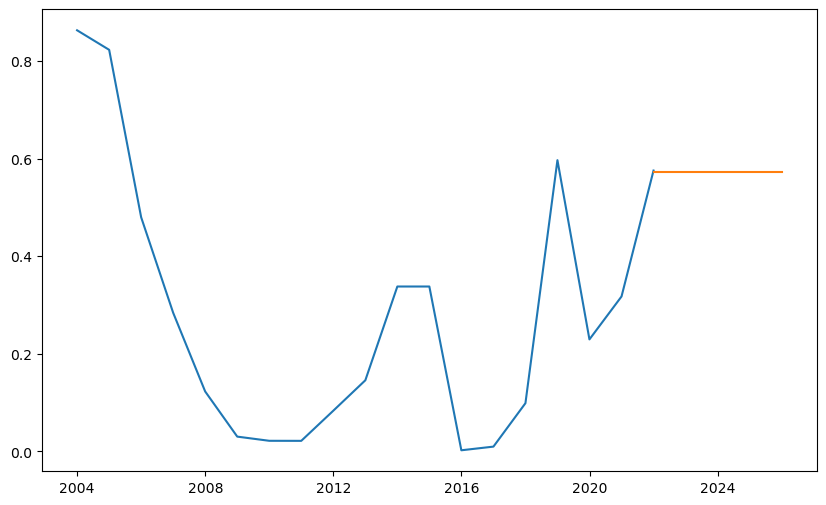

In [22]:
model = ARIMA(np.asarray(df_CR).astype(float), order= (0,1,1))  
model_fit = model.fit()
forecast = model_fit.forecast(steps=5)  
predictions=forecast
forecast = pd.DataFrame(forecast, index=pd.date_range(start=df_CR.index[-1] , periods=5, freq='Y'), columns=['Forecast'])
plt.figure(figsize=(10, 6))
plt.plot(df_CR.index, df_CR.iloc[:,0], label='Training')
plt.plot(forecast.index, forecast['Forecast'], label='Forecast')
plt.show()




In [23]:
test.index

DatetimeIndex(['2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31'], dtype='datetime64[ns]', name='Year_End', freq=None)

In [24]:
forecast

,Forecast
2021-12-31,0.573002
2022-12-31,0.573002
2023-12-31,0.573002
2024-12-31,0.573002
2025-12-31,0.573002


In [25]:
def ARIMA_Imple(train,test):
    np.asarray(train.iloc[:,0])
    
    order =select_BestOrder(orders,train,test)
    
    model = ARIMA(np.asarray(train).astype(float), order= order)  
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))  
    predictions=forecast
    forecast = pd.DataFrame(forecast, index=test.index, columns=['Forecast'])
    
    rmse = np.sqrt(mean_squared_error(test, predictions))
    
    
    last_index = test.index[0]
    forecast_values = model_fit.forecast(steps=50)

    forecast_index = pd.date_range(start=last_index , periods=50, freq='Y')

    # Create a dataframe with the index and forecasted values
    forecast_df = pd.DataFrame({'Forecast': forecast_values})
    forecast_df.index= forecast_index

    # Print the forecast dataframe
    forecast_df


    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train.iloc[:,0], label='Training')
    plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast')
    plt.plot(test.index, test.iloc[:,0], label='Actual')



    plt.xlabel('Time')
    plt.ylabel(train.columns[0])
    plt.legend()
    plt.title('ARIMA Forecast Of '+train.columns[0])
    plt.savefig(train.columns[0]+'.PNG')
    plt.show()
    print("\n RMSE =",rmse)
    print("\n")
    print(predictions)

C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


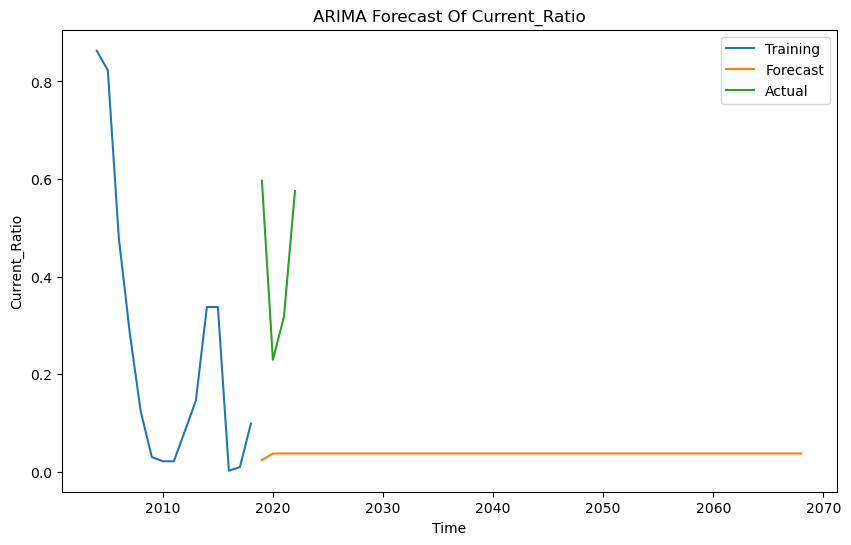


 RMSE = 0.42782666954967713


[0.02408326 0.0377722  0.0377722  0.0377722 ]


In [26]:
np.asarray(train.iloc[:,0])

    
model = ARIMA(np.asarray(train_CR).astype(float), order= (0,1,2))  
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test_CR))  
predictions=forecast
forecast = pd.DataFrame(forecast, index=test_CR.index, columns=['Forecast'])
    
rmse = np.sqrt(mean_squared_error(test_CR, predictions))
    
    
last_index = test_CR.index[0]
forecast_values = model_fit.forecast(steps=50)

forecast_index = pd.date_range(start=last_index , periods=50, freq='Y')

# Create a dataframe with the index and forecasted values
forecast_df = pd.DataFrame({'Forecast': forecast_values})
forecast_df.index= forecast_index

    # Print the forecast dataframe
forecast_df


plt.figure(figsize=(10, 6))
plt.plot(train_CR.index, train_CR.iloc[:,0], label='Training')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast')
plt.plot(test_CR.index, test_CR.iloc[:,0], label='Actual')



plt.xlabel('Time')
plt.ylabel(train_CR.columns[0])
plt.legend()
plt.title('ARIMA Forecast Of '+train_CR.columns[0])
plt.savefig(train_CR.columns[0]+'.PNG')
plt.show()
print("\n RMSE =",rmse)
print("\n")
print(predictions)

C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationar

(2, 1, 1)


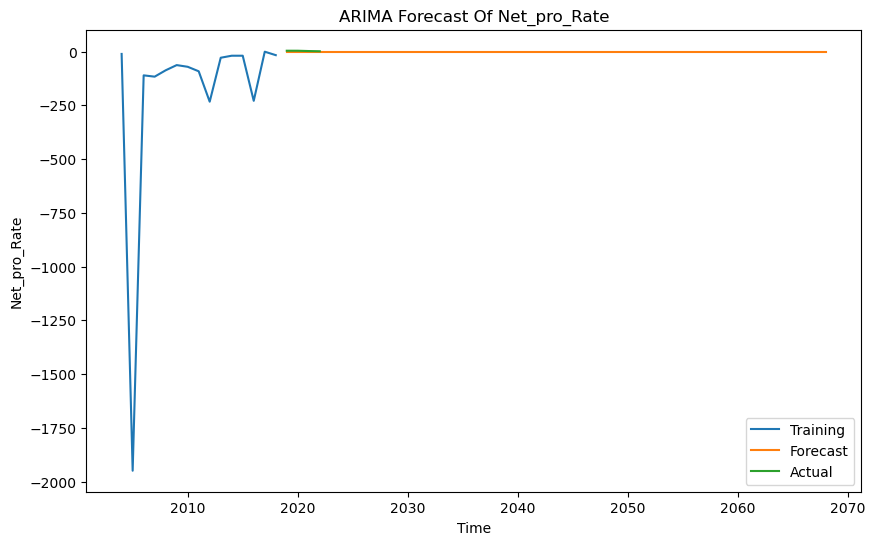


 RMSE = 3.1191265785069593


[0. 0. 0. 0.]


In [27]:
ARIMA_Imple(train,test)

C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationar

(2, 1, 1)


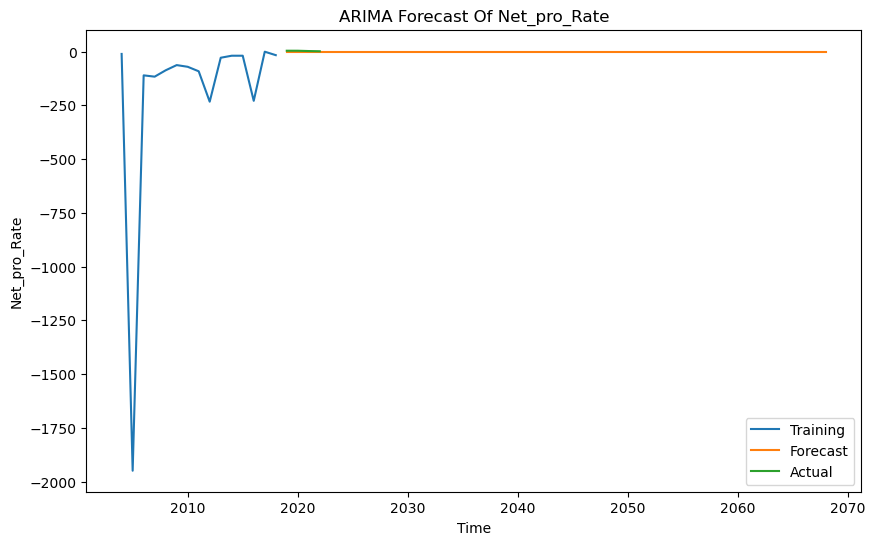


 RMSE = 3.1191265785069593


[0. 0. 0. 0.]


In [28]:
ARIMA_Imple(train,test)

C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sanju

(2, 0, 0)


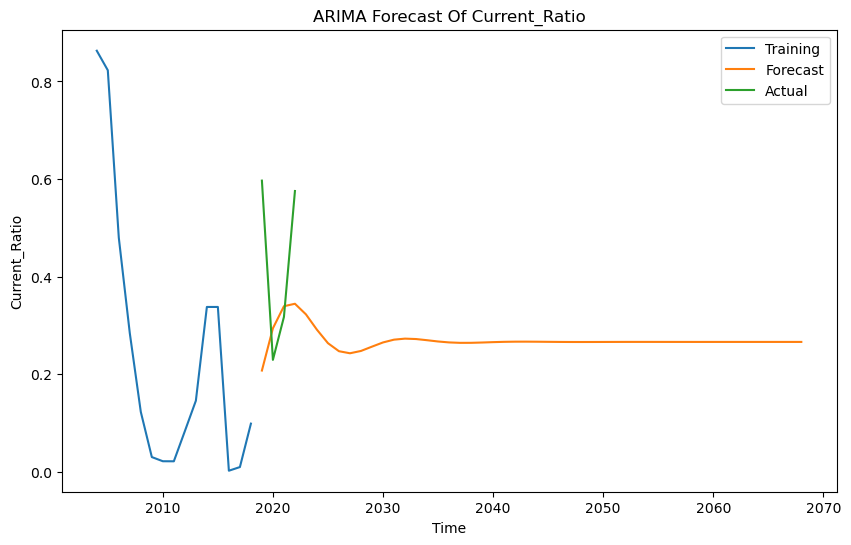


 RMSE = 0.22880651003691704


[0.20765825 0.29422936 0.33944953 0.34447274]


In [29]:
ARIMA_Imple(train_CR,test_CR)

In [30]:
test_CR

,Current_Ratio
Year_End,
2018-12-31,0.596744
2019-12-31,0.229592
2020-12-31,0.317553
2021-12-31,0.575480


C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting M

(2, 0, 0)


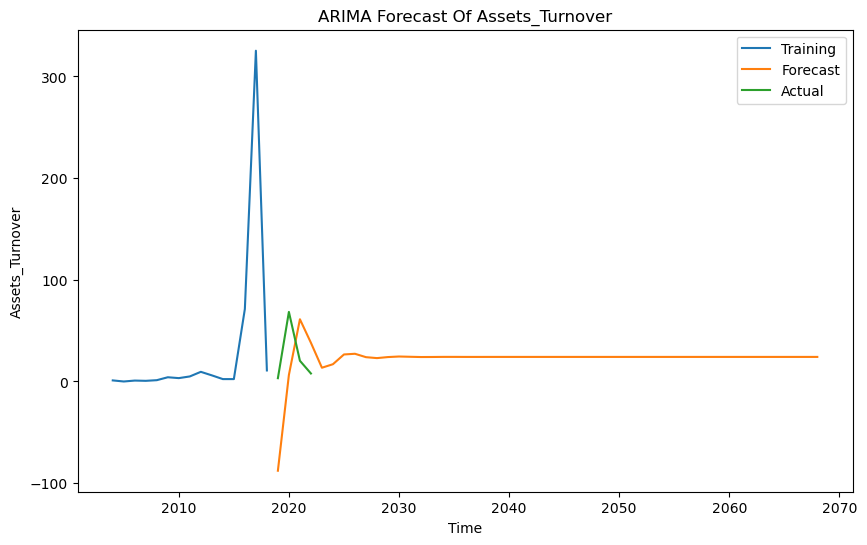


 RMSE = 60.628682935464596


[-87.74789431   6.43924225  61.19503618  38.06556625]


In [31]:
ARIMA_Imple(train_AT,test_AT)

In [32]:
test_AT

,Assets_Turnover
Year_End,
2018-12-31,3.247274
2019-12-31,68.446900
2020-12-31,20.371686
2021-12-31,7.870654


C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting M

(2, 0, 0)


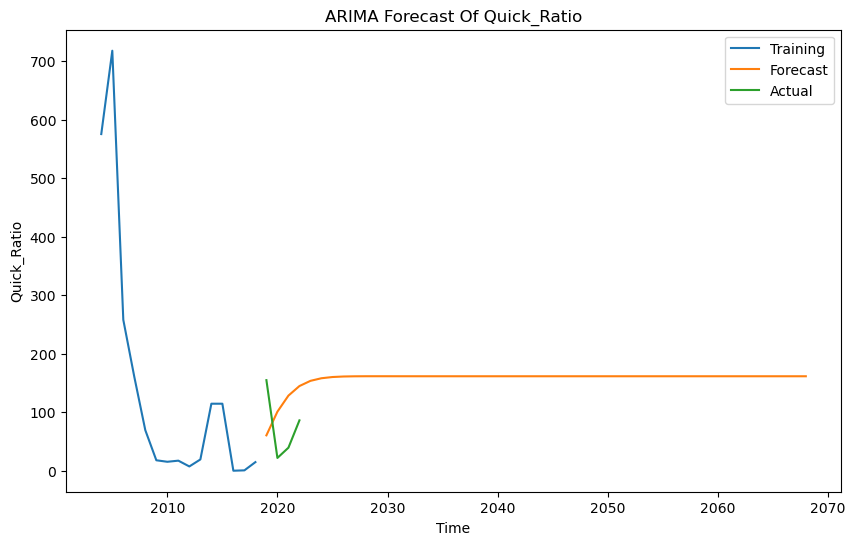


 RMSE = 81.44377345582511


[ 60.43626188 100.89825137 128.38527989 144.73413751]


In [33]:
ARIMA_Imple(train_QR,test_QR)

C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationar

(2, 0, 0)


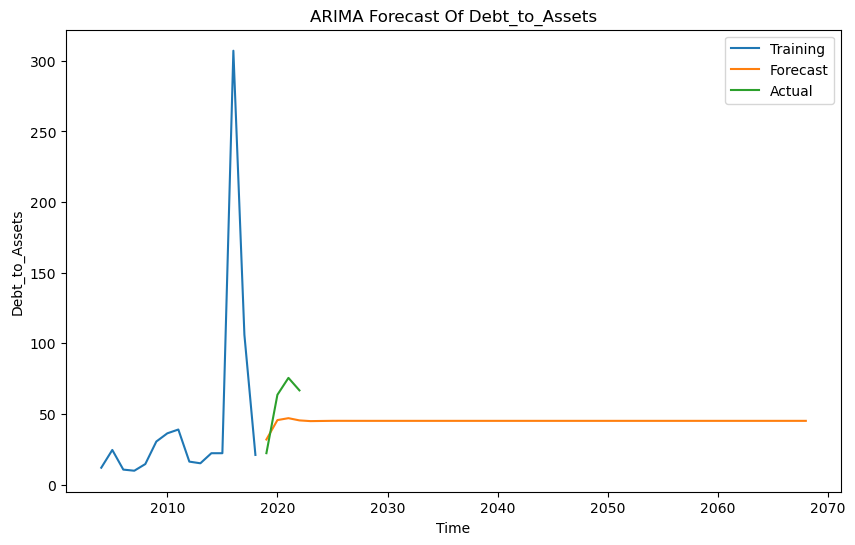


 RMSE = 20.488327465280737


[31.97990706 45.71203061 47.07033262 45.49603599]


In [34]:
ARIMA_Imple(train_DA,test_DA)

In [35]:
"""last_index = test.index[0]
forecast_values = model_fit.forecast(steps=20)

forecast_index = pd.date_range(start=last_index , periods=20, freq='Y')

# Create a dataframe with the index and forecasted values
forecast_df = pd.DataFrame({'Forecast': forecast_values})
forecast_df.index= forecast_index

# Print the forecast dataframe
forecast_df"""

"last_index = test.index[0]\nforecast_values = model_fit.forecast(steps=20)\n\nforecast_index = pd.date_range(start=last_index , periods=20, freq='Y')\n\n# Create a dataframe with the index and forecasted values\nforecast_df = pd.DataFrame({'Forecast': forecast_values})\nforecast_df.index= forecast_index\n\n# Print the forecast dataframe\nforecast_df"

In [36]:
"""plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Net_pro_Rate'], label='Training')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast')
plt.plot(test.index, test['Net_pro_Rate'], label='Actual')

plt.xlabel('Time')
plt.ylabel('Profit')
plt.legend()
plt.title('ARIMA Forecast Of Net Profit')
plt.show()"""

"plt.figure(figsize=(10, 6))\nplt.plot(train.index, train['Net_pro_Rate'], label='Training')\nplt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast')\nplt.plot(test.index, test['Net_pro_Rate'], label='Actual')\n\nplt.xlabel('Time')\nplt.ylabel('Profit')\nplt.legend()\nplt.title('ARIMA Forecast Of Net Profit')\nplt.show()"

C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationar

(2, 0, 0)
             Forecast
2018-12-31  31.979907
2019-12-31  45.712031
2020-12-31  47.070333
2021-12-31  45.496036
2022-12-31  44.987737
2023-12-31  45.095465
2024-12-31  45.186342
2025-12-31  45.190546
2026-12-31  45.179140
2027-12-31  45.176218
2028-12-31  45.177156
2029-12-31  45.177744
2030-12-31  45.177739
2031-12-31  45.177658
2032-12-31  45.177642


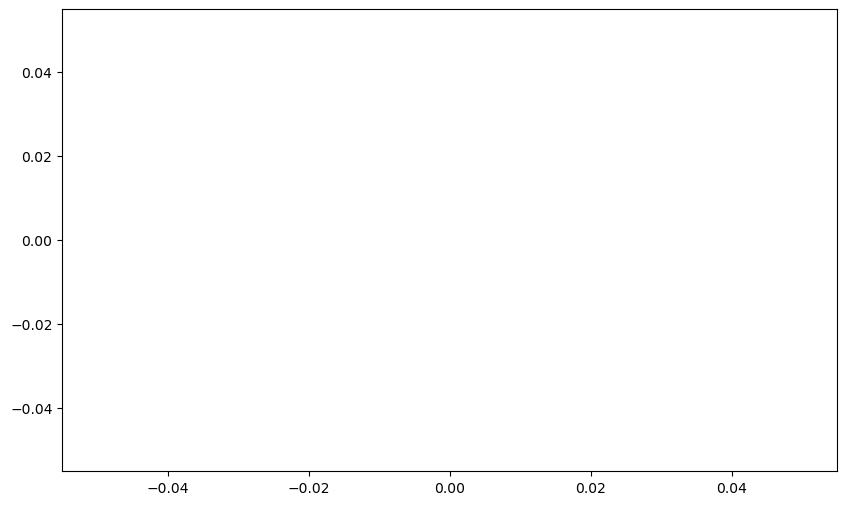

In [37]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Your existing code here ...
 
    
np.asarray(train_DA.iloc[:,0])
    
order =select_BestOrder(orders,train_DA,test_DA)
    
model = ARIMA(np.asarray(train_DA).astype(float), order= order)  
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test_DA))  
predictions=forecast
forecast = pd.DataFrame(forecast, index=test.index, columns=['Forecast'])
    
rmse = np.sqrt(mean_squared_error(test_DA, predictions))
   
    
    
last_index = test_DA.index[0]
forecast_values = model_fit.forecast(steps=15)

forecast_index = pd.date_range(start=last_index , periods=15, freq='Y')
# Create a dataframe with the index and forecasted values
forecast_df = pd.DataFrame({'Forecast': forecast_values})
forecast_df.index= forecast_index

    # Print the forecast dataframe
print(forecast_df)


fig, ax = plt.subplots(figsize=(10, 6))
line_train = ax.plot([], [], label='Training')
line_forecast = ax.plot([], [], label='Forecast')
line_actual = ax.plot([], [], label='Actual')

# Define the initialization function
def init():
    ax.set_xlabel('Time')
    ax.set_ylabel(train_DA.columns[0])
    ax.set_title('ARIMA Forecast of ' + train_DA.columns[0])
    ax.legend()
    return line_train, line_forecast, line_actual

# Define the update function for each frame
def update(frame):
    line_train.set_data(train_DA.index, train_DA.iloc[:, 0])
    line_forecast.set_data(forecast_df.index[:frame+1], forecast_df['Forecast'][:frame+1])
    line_actual.set_data(test_DA.index, test_DA.iloc[:, 0])
    return line_train, line_forecast, line_actual

# Create the forecast dataframe and other variables
# Based on your code snippet
# Make sure to replace the relevant parts with your code

# ...



# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(forecast_df)+1, init_func=init)

# Display the animation
plt.show()



C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sanjulam\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationar

(2, 0, 0)


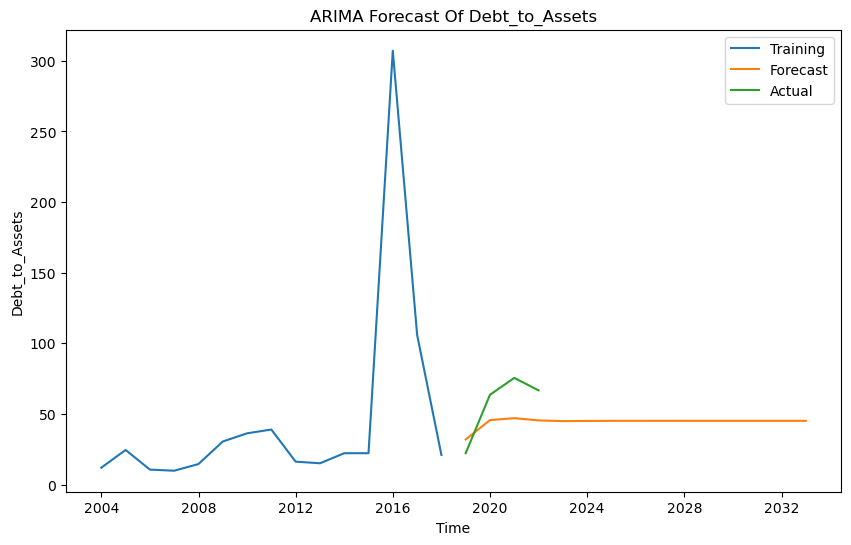


 RMSE = 20.488327465280737


[31.97990706 45.71203061 47.07033262 45.49603599]


In [44]:
import json
import base64
import io
import secrets
import string

np.asarray(train_DA.iloc[:,0])
    
order =select_BestOrder(orders,train_DA,test_DA)
    
model = ARIMA(np.asarray(train_DA).astype(float), order= order)  
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test_DA))  
predictions=forecast
forecast = pd.DataFrame(forecast, index=test.index, columns=['Forecast'])
    
rmse = np.sqrt(mean_squared_error(test_DA, predictions))
    
    
last_index = test_DA.index[0]
forecast_values = model_fit.forecast(steps=15)

forecast_index = pd.date_range(start=last_index , periods=15, freq='Y')
# Create a dataframe with the index and forecasted values
forecast_df = pd.DataFrame({'Forecast': forecast_values})
forecast_df.index= forecast_index

    # Print the forecast dataframe
forecast_df


plt.figure(figsize=(10, 6))
plt.plot(train_DA.index, train_DA.iloc[:,0], label='Training')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast')
plt.plot(test_DA.index, test_DA.iloc[:,0], label='Actual')

plt.xlabel('Time')
plt.ylabel(train_DA.columns[0])
plt.legend()
plt.title('ARIMA Forecast Of '+train_DA.columns[0])

plot_data = {
    'train_data': {
        'index': train_DA.index.astype(str).tolist(),
        'values': train_DA.iloc[:, 0].values.tolist()
    },
    'forecast_data': {
        'index': forecast_df.index.astype(str).tolist(),
        'values': forecast_df['Forecast'].values.tolist()
    },
    'test_data': {
        'index': test_DA.index.astype(str).tolist(),
        'values': test_DA.iloc[:, 0].values.tolist()
    }
}


x=(''.join(secrets.choice(string.ascii_uppercase + string.ascii_lowercase) for i in range(7)))

# Save the plot data to a JSON file
with open(x+'.json', 'w') as file:
    json.dump(plot_data, file)




plt.show()

print("\n RMSE =",rmse)
print("\n")
print(predictions)






In [43]:
import secrets
import string

x=(''.join(secrets.choice(string.ascii_uppercase + string.ascii_lowercase) for i in range(7)))
print(x)

QsGwdtg
